In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#Load the dataset:
df = pd.read_csv('dt.csv')

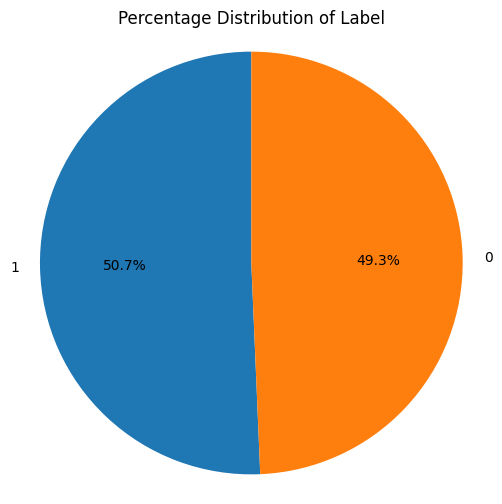

In [5]:
import matplotlib.pyplot as plt

# Calculate the value counts and percentages
value_counts = df['label'].value_counts()
percentages = value_counts / len(df) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Label')
plt.axis('equal')
plt.show()

In [6]:
# Split the dataset into train and test sets
df['Ratio'] = df['Ratio'].astype(str)
# Concatenate 'articles', 'sentiment', and 'ratio' columns
X = df['articles'] + ' ' + df['Sentiment'] + ' ' + df['Ratio']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [7]:
#Train the logistic regression model:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

C:\Users\Azur Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Make predictions on the test set:
y_pred = model.predict(X_test_vect)

In [9]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9076923076923077
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       600
           1       0.89      0.93      0.91       635

    accuracy                           0.91      1235
   macro avg       0.91      0.91      0.91      1235
weighted avg       0.91      0.91      0.91      1235

Confusion Matrix:
[[528  72]
 [ 42 593]]


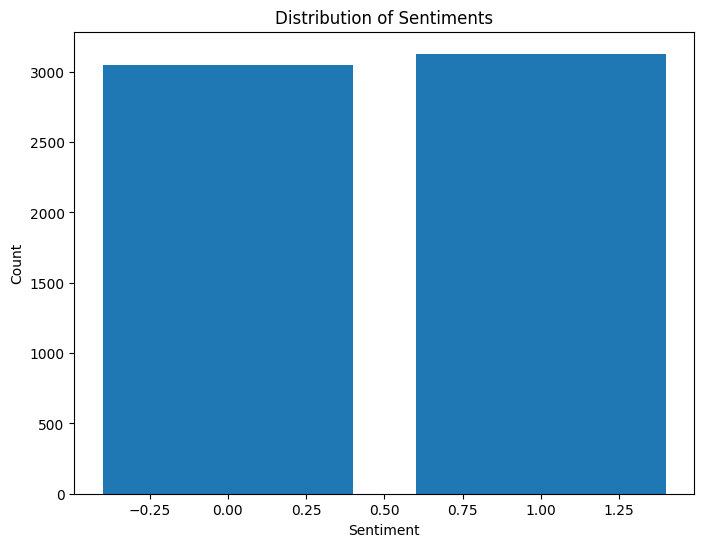

In [10]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

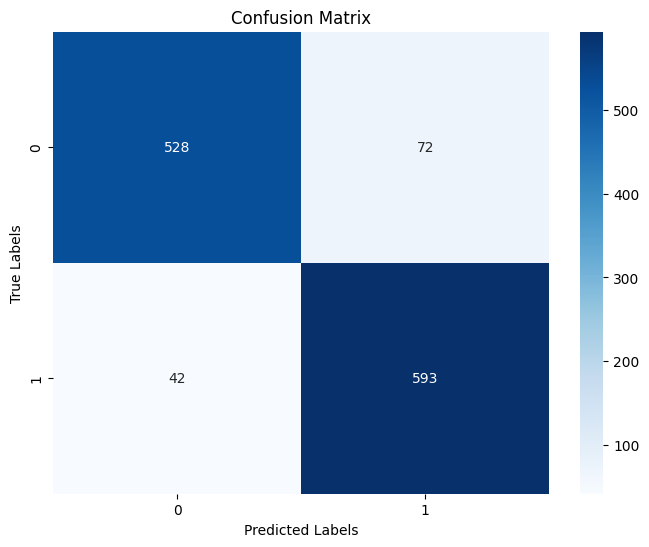

In [11]:
import matplotlib.pyplot as plt
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
